In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_classification
X,y= make_classification(n_samples = 1000 , n_features= 2 , n_classes=2 , n_clusters_per_class=2 , n_redundant=0)

In [10]:
pd.DataFrame(X)[0]

,0
0,-0.230180
1,-1.834385
2,0.738776
3,0.669671
4,1.383000
...,...
995,1.320314
996,-0.622178
997,-0.940074
998,0.708435


In [11]:
pd.DataFrame(X)[1]

,1
0,-0.713229
1,-1.317602
2,-1.028998
3,-1.020822
4,-0.884747
...,...
995,-0.954536
996,-0.670979
997,1.200515
998,-0.973568


<Axes: xlabel='0', ylabel='1'>

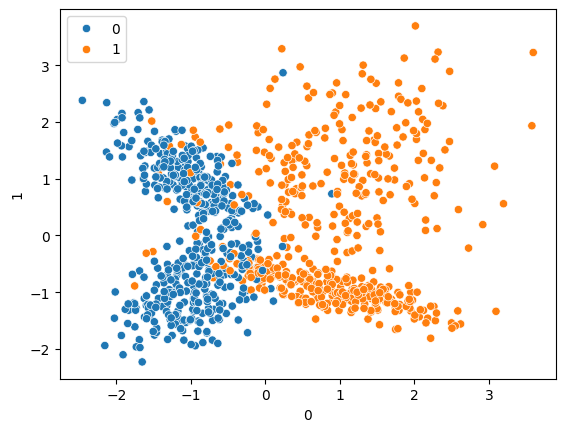

In [14]:
sns.scatterplot(x = pd.DataFrame(X)[0] , y = pd.DataFrame(X)[1], hue = y)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=1)

In [18]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
model.coef_


array([[2.55320046, 0.11039372]])

In [22]:
from sklearn.metrics import classification_report , confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92        97
           1       0.93      0.92      0.93       103

    accuracy                           0.93       200
   macro avg       0.92      0.93      0.92       200
weighted avg       0.93      0.93      0.93       200



In [23]:
print(confusion_matrix(y_test,y_pred))

[[90  7]
 [ 8 95]]


In [24]:
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly']}

In [26]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [27]:
best_model = SVC(**best_params)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

print("Classification Report with Best Hyperparameters:")
print(classification_report(y_test, y_pred_best))

print("Confusion Matrix with Best Hyperparameters:")
print(confusion_matrix(y_test, y_pred_best))

Classification Report with Best Hyperparameters:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        97
           1       0.95      0.92      0.94       103

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200

Confusion Matrix with Best Hyperparameters:
[[92  5]
 [ 8 95]]
